<a href="https://colab.research.google.com/github/jlopez1288/Predictive_Analytics101/blob/main/Project__Hand_Written__Digits_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2
import numpy as np

import keras
from keras.datasets import mnist
from keras.utils import np_utils
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from keras.models import load_model
from keras.utils.vis_utils import plot_model

from google.colab.patches import cv2_imshow

In [2]:
# loads the MNIST dataset
(x_train, y_train), (x_test, y_test)  = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
# Training Parameters
batch_size = 150
epochs = 6

In [4]:
# Lets store the number of rows and columns
img_rows = x_train[0].shape[0]
img_cols = x_train[1].shape[0]

In [5]:
# Getting our date in the right 'shape' needed for Keras
# We need to add a 4th dimenion to our data thereby changing our
# Our original image shape of (60000,28,28) to (60000,28,28,1)
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)

In [6]:
# store the shape of a single image 
input_shape = (img_rows, img_cols, 1)

In [7]:
# change our image type to float32 data type
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [8]:
# Normalize our data by changing the range from (0 to 255) to (0 to 1)
x_train /= 255
x_test /= 255

In [9]:
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [10]:
# Now we one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

In [11]:
# Let's count the number columns in our hot encoded matrix 
print ("Number of Classes: " + str(y_test.shape[1]))

Number of Classes: 10


In [12]:
num_classes = y_test.shape[1]
num_pixels = x_train.shape[1] * x_train.shape[2]

In [13]:
# create model

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Conv2D(64, (3, 3), activation='relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

In [14]:
model.compile(loss = 'categorical_crossentropy', optimizer = keras.optimizers.Adadelta(), metrics = ['accuracy'])

In [15]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 12, 12, 64)        0         
                                                                 
 flatten (Flatten)           (None, 9216)              0         
                                                                 
 dense (Dense)               (None, 128)               1179776   
                                                        

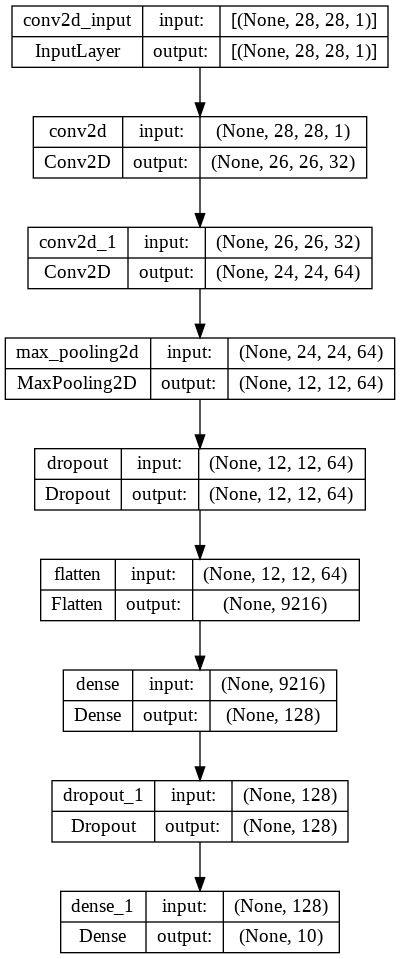

In [16]:
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [17]:
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_test, y_test))

Epoch 1/6
400/400 [==============================] - 161s 400ms/step - loss: 2.2784 - accuracy: 0.1403 - val_loss: 2.2456 - val_accuracy: 0.2758
Epoch 2/6
400/400 [==============================] - 160s 400ms/step - loss: 2.2276 - accuracy: 0.2460 - val_loss: 2.1832 - val_accuracy: 0.4696
Epoch 3/6
400/400 [==============================] - 160s 400ms/step - loss: 2.1625 - accuracy: 0.3507 - val_loss: 2.1026 - val_accuracy: 0.5877
Epoch 4/6
400/400 [==============================] - 159s 396ms/step - loss: 2.0790 - accuracy: 0.4302 - val_loss: 1.9984 - val_accuracy: 0.6520
Epoch 5/6
400/400 [==============================] - 158s 393ms/step - loss: 1.9727 - accuracy: 0.4960 - val_loss: 1.8655 - val_accuracy: 0.6894
Epoch 6/6
400/400 [==============================] - 160s 399ms/step - loss: 1.8437 - accuracy: 0.5418 - val_loss: 1.7044 - val_accuracy: 0.7201


In [18]:
#Evaluate the model
score = model.evaluate(x_test, y_test, verbose=0)

In [19]:
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 1.7044142484664917
Test accuracy: 0.7200999855995178


In [27]:
model.save('cnn1.h5')

In [21]:
def x_cord_contour(contour):
    # This function take a contour from findContours
    # it then outputs the x centroid coordinates
    M = cv2.moments(contour)
    return (int(M['m10']/M['m00']))

In [30]:
def makeSquare(not_square):
    # This function takes an image and makes the dimenions square
    # It adds black pixels as the padding where needed

    BLACK = [0,0,0]
    img_dim = not_square.shape
    height = img_dim[0]
    width = img_dim[1]
    #print("Height = ", height, "Width = ", width)
    if (height == width):
        square = not_square
        return square
    else:
        doublesize = cv2.resize(not_square,(2*width, 2*height), interpolation = cv2.INTER_CUBIC)
        height = height * 2
        width = width * 2
        #print("New Height = ", height, "New Width = ", width)
        if (height > width):
            pad = int((height - width)/2)
            #print("Padding = ", pad)
            doublesize_square = cv2.copyMakeBorder(doublesize,0,0,pad,pad,cv2.BORDER_CONSTANT,value=BLACK)
        else:
            pad = (width - height)/2
            #print("Padding = ", pad)
            doublesize_square = cv2.copyMakeBorder(doublesize,pad,pad,0,0,\
                                                   cv2.BORDER_CONSTANT,value=BLACK)
    doublesize_square_dim = doublesize_square.shape
    #print("Sq Height = ", doublesize_square_dim[0], "Sq Width = ", doublesize_square_dim[1])
    return doublesize_square

In [31]:
def resize_to_pixel(dimensions, image):
    # This function then re-sizes an image to the specificied dimenions

    buffer_pix = 4
    dimensions  = dimensions - buffer_pix
    squared = image
    r = float(dimensions) / squared.shape[1]
    dim = (dimensions, int(squared.shape[0] * r))
    resized = cv2.resize(image, dim, interpolation = cv2.INTER_AREA)
    img_dim2 = resized.shape
    height_r = img_dim2[0]
    width_r = img_dim2[1]
    BLACK = [0,0,0]
    if (height_r > width_r):
        resized = cv2.copyMakeBorder(resized,0,0,0,1,cv2.BORDER_CONSTANT,value=BLACK)
    if (height_r < width_r):
        resized = cv2.copyMakeBorder(resized,1,0,0,0,cv2.BORDER_CONSTANT,value=BLACK)
    p = 2
    ReSizedImg = cv2.copyMakeBorder(resized,p,p,p,p,cv2.BORDER_CONSTANT,value=BLACK)
    img_dim = ReSizedImg.shape
    height = img_dim[0]
    width = img_dim[1]
    #print("Padded Height = ", height, "Width = ", width)
    return ReSizedImg

In [24]:
classifier = load_model('cnn1.h5')

In [37]:
from skimage import io

img = io.imread("/content/IMG_3095.jpg")

In [34]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


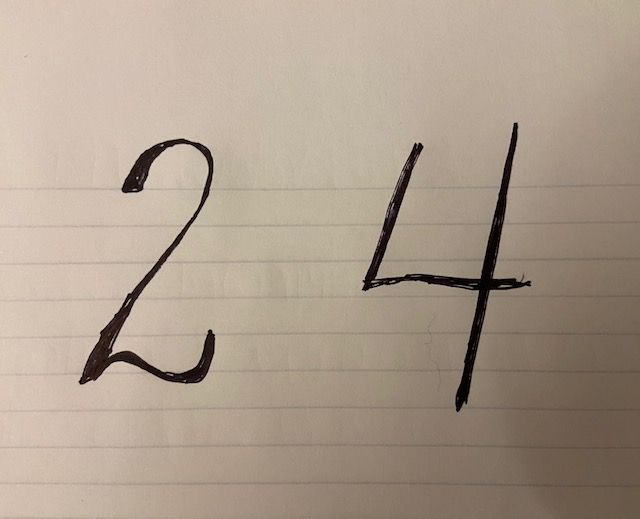

-1

In [38]:
image = cv2.imread('IMG_3095.jpg')
gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
cv2_imshow(image)
cv2.waitKey(0)

In [48]:
import tensorflow as tf
import keras
model = keras.models.load_model('cnn1.h5', custom_objects={'tf': tf})

import cv2
img = cv2.imread('IMG_3096.jpg')
gray = cv2.cvtColor(img , cv2.COLOR_BGR2GRAY)
resize = cv2.resize(gray,(28,28), interpolation = cv2.INTER_AREA)
new_img = tf.keras.utils.normalize(resize, axis=1)
new_img = np.array(new_img).reshape(-1,img_size,img_size,1)
predictions = model.predict(new_img)
print(np.argmax(predictions))

NameError: ignored

In [39]:
# Blur image then find edges using Canny 
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

In [40]:
edged = cv2.Canny(blurred, 30, 150)

In [41]:
# Find Contours
contours, _ = cv2.findContours(edged, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

In [42]:
#Sort out contours left to right by using their x cordinates
contours = sorted(contours, key = x_cord_contour, reverse = False)

ZeroDivisionError: ignored

In [43]:
# Create empty array to store entire number
full_number = []

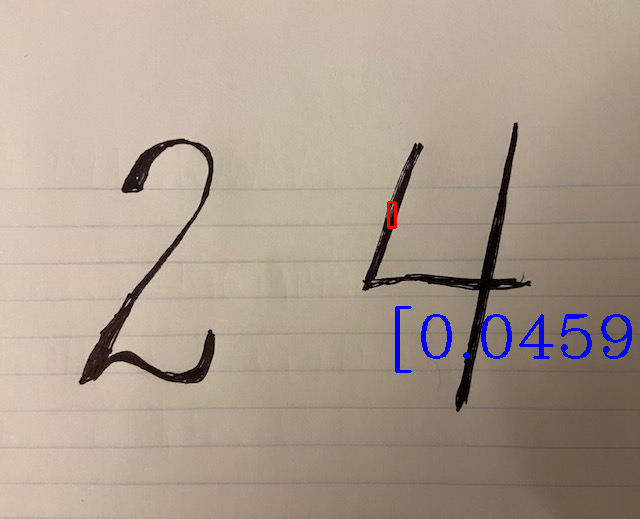

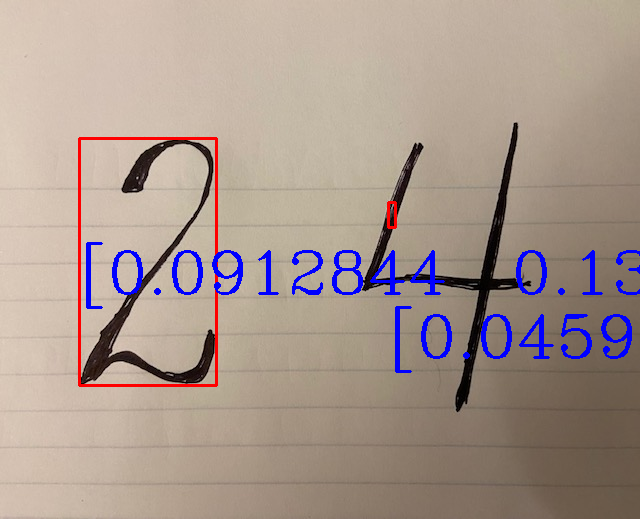

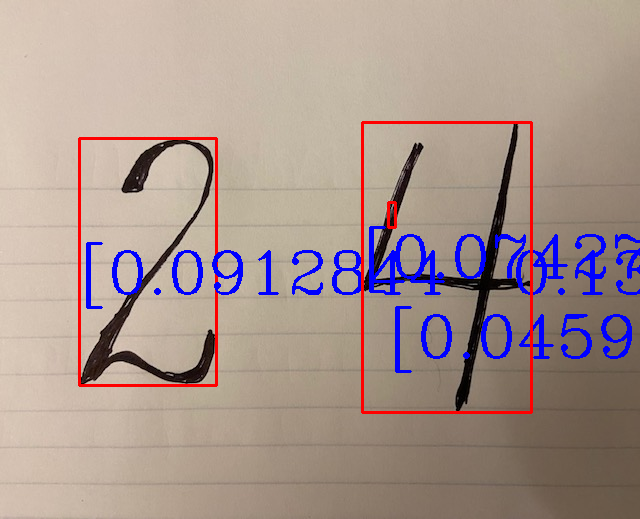

In [44]:
# loop over the contours
for c in contours:
    # compute the bounding box for the rectangle
    (x, y, w, h) = cv2.boundingRect(c)    

    if w >= 5 and h >= 25:
        roi = blurred[y:y + h, x:x + w]
        ret, roi = cv2.threshold(roi, 127, 255,cv2.THRESH_BINARY_INV)
        roi = makeSquare(roi)
        roi = resize_to_pixel(28, roi)
        cv2_imshow(roi)
        roi = roi / 255.0       
        roi = roi.reshape(1,28,28,1) 

        ## Get Prediction
        res = str(classifier.predict(roi, 1, verbose = 0)[0])
        full_number.append(res)
        cv2.rectangle(image, (x, y), (x + w, y + h), (0, 0, 255), 2)
        cv2.putText(image, res, (x , y + 155), cv2.FONT_HERSHEY_COMPLEX, 2, (255, 0, 0), 2)
        cv2_imshow(image)
        cv2.waitKey(0) 
        
cv2.destroyAllWindows()

In [45]:
print ("The number is: " + ''.join(full_number))

The number is: [0.04599496 0.14972372 0.08011188 0.12648524 0.04202778 0.05536031
 0.1383389  0.08797139 0.18124364 0.09274223][0.0912844  0.13691138 0.11410177 0.10477979 0.06971263 0.07514154
 0.08969975 0.08005219 0.15985356 0.07846298][0.07427391 0.05465024 0.09702034 0.09737867 0.16816726 0.07899228
 0.10056195 0.1458701  0.0743477  0.10873757]


In [ ]:
#The models printed the numbers but with a low level of accuracy

##References


* https://colab.research.google.com/drive/1jAl0NpEnuMb4T4UnnK9kGTLqSnpW4btT?usp=sharing

*   https://stackoverflow.com/questions/54347963/tf-is-not-defined-on-load-model-using-lambda
*   https://stackoverflow.com/questions/7479292/get-zerodivisionerror-float-division-in-python